#Exercise 3:Fully Connected Deep Neural Network model
*	Implement a multi-class classification neural network with number of layers of your choice
*	Vary optimization methods
*	Choose suitable Loss functions
*	Add drop out layers
* Add batch normalization layers


In [1]:
#Downloading the MNIST Dataset
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


8


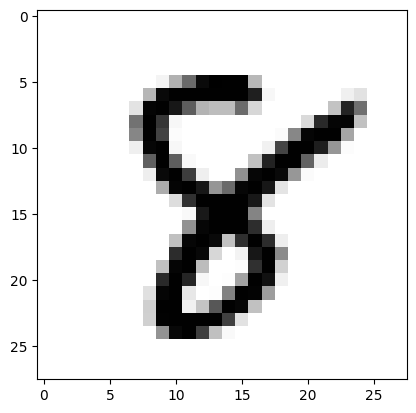

In [2]:
import matplotlib.pyplot as plt
import random
image_index =random .randint(0,60000)  # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)
input_shape = 28*28
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 784)
Number of images in x_train 60000
Number of images in x_test 10000


In [5]:
from keras import Sequential
from keras.layers import Dense

#Model 1 with 2 hidden layers




In [6]:
model1 = Sequential()
#First Hidden Layer
model1.add(Dense(1500, activation='relu', input_dim=input_shape))#Second  Hidden Layer
model1.add(Dense(100, activation='relu'))
model1.add(Dense(10, activation='softmax'))

#Compiling the neural network
model1.compile(optimizer ='SGD',loss='sparse_categorical_crossentropy', metrics =['accuracy'])

#Fitting the data to the training dataset
model1.fit(x_train,y_train, batch_size=32, epochs=2)


model1.evaluate(x_test, y_test)

Epoch 1/2
1875/1875 [==============================] - 37s 18ms/step - loss: 0.5133 - accuracy: 0.8723
Epoch 2/2
313/313 [==============================] - 2s 6ms/step - loss: 0.2142 - accuracy: 0.9383


[0.21416456997394562, 0.9383000135421753]

In [7]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1500)              1177500   
                                                                 
 dense_1 (Dense)             (None, 100)               150100    
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 1328610 (5.07 MB)
Trainable params: 1328610 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 0s 90ms/step
9


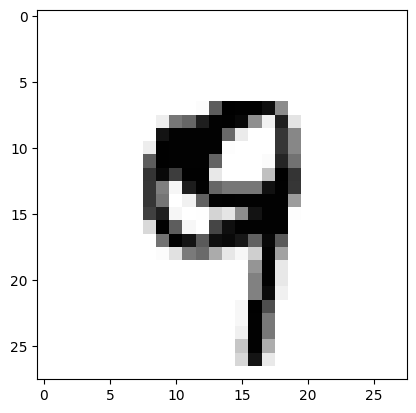

In [8]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model1.predict(x_test[image_index].reshape(1, 784, 1))
print(pred.argmax())

#Model 2 with 3 Hidden layers

In [9]:
model2 = Sequential()
#First Hidden Layer
model2.add(Dense(1500, activation='relu', input_dim=input_shape))#Second  Hidden Layer
model2.add(Dense(750, activation='relu'))#Output Layer
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10, activation='softmax'))

#Compiling the neural network
model2.compile(optimizer ='SGD',loss='sparse_categorical_crossentropy', metrics =['accuracy'])

#Fitting the data to the training dataset
model2.fit(x_train,y_train, batch_size=32, epochs=2)


model2.evaluate(x_test, y_test)

Epoch 1/2
1875/1875 [==============================] - 45s 23ms/step - loss: 0.4817 - accuracy: 0.8781
Epoch 2/2
313/313 [==============================] - 3s 9ms/step - loss: 0.1802 - accuracy: 0.9471


[0.1802416443824768, 0.9470999836921692]

#Model 3 with drop out and batch normalization layers

In [ ]:
from tensorflow.keras.layers import Dropout
from keras.layers import BatchNormalization
model3 = Sequential()
#First Hidden Layer
model3.add(Dense(1500, activation='relu', input_dim=input_shape))#Second  Hidden Layer
model3.add(Dropout(0.2))
model3.add(BatchNormalization())

model3.add(Dense(750, activation='relu'))
model3.add(Dropout(0.2))
model3.add(BatchNormalization())

model3.add(Dense(100, activation='relu'))
model3.add(Dropout(0.2))
model3.add(BatchNormalization())

model3.add(Dense(10, activation='softmax'))

#Compiling the neural network
model3.compile(optimizer ='adam',loss='sparse_categorical_crossentropy', metrics =['accuracy'])

#Fitting the data to the training dataset
model3.fit(x_train,y_train, batch_size=32, epochs=2)


model3.evaluate(x_test, y_test)

Epoch 1/2
 651/1875 [=========>....................] - ETA: 47s - loss: 0.3530 - accuracy: 0.8938